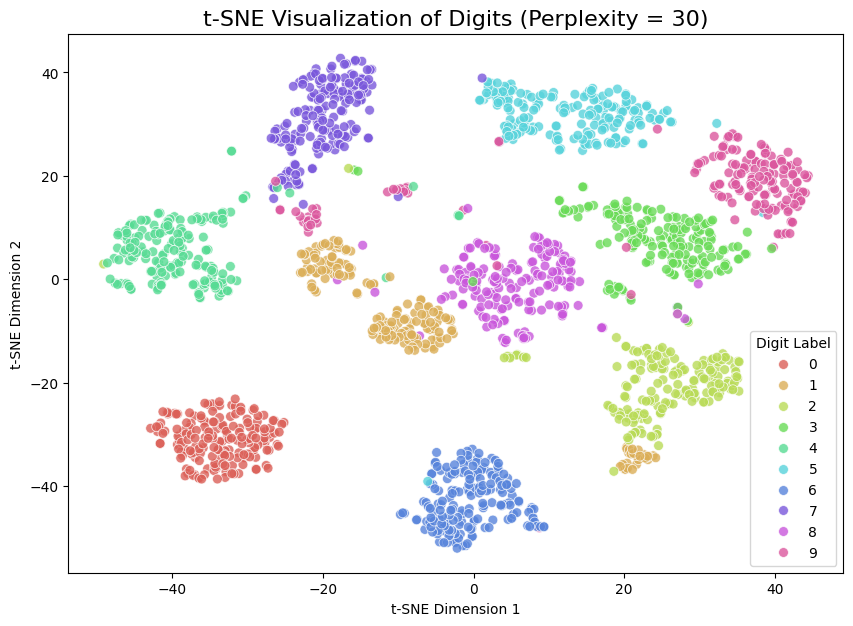

Head of the DataFrame with t-SNE results:
   tsne-2d-one  tsne-2d-two  label
0   -39.039124   -30.140669      0
1   -15.394278    -2.834400      1
2     5.796394   -14.526552      2
3    28.260927     2.379571      3
4   -36.536537     2.719114      4


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits

# --- Step 1: Load and Scale Data ---
# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Scale the data (a crucial prerequisite for t-SNE)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# --- Step 2: Apply Final t-SNE Model ---
# We chose 30 as our "best" perplexity from the exploration step.
# We set n_iter to a higher value like 1000 for a more stable result.
best_perplexity = 30
tsne_final = TSNE(n_components=2, 
                  perplexity=best_perplexity, 
                  max_iter=1000, 
                  random_state=42)

# Apply the t-SNE transformation to our scaled data
X_tsne_final = tsne_final.fit_transform(X_scaled)


# --- Step 3: Store and Display Results ---
# Create a new DataFrame to store the 2D coordinates and original labels.
# This makes plotting and inspection easier.
df_tsne = pd.DataFrame(X_tsne_final, columns=['tsne-2d-one', 'tsne-2d-two'])
df_tsne['label'] = y


# --- Step 4: Visualize the Final Result ---
# Create a scatter plot of the 2D data.
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 10), # Use a color palette with 10 distinct colors
    data=df_tsne,
    legend="full",
    alpha=0.8,
    s=50 # Adjust point size
)
plt.title(f't-SNE Visualization of Digits (Perplexity = {best_perplexity})', fontsize=16)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Digit Label')
plt.show()


# --- Step 5: Print the Head of the Resulting DataFrame ---
# The DataFrame now contains the low-dimensional representation of each data point.
print("Head of the DataFrame with t-SNE results:")
print(df_tsne.head())